# AIP Assignment 1

## Importing necessary libraries

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

## 1.  Up-sample and down-sample the the image of Figure 1 by scale factor 4. Discuss the effect of changing sampling rate. Also observe the effect of different quantization levels (L = 2, 4, 8, 16, 32, 64, 128, 256) for this image. (Figure 1 image : fig1.jpg)

Size of image:
(534, 400)

Fig 1 Original Image:


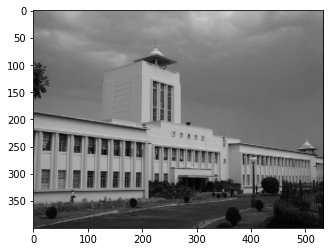

In [ ]:
img = Image.open('fig1.jpg')
img.load()

print("Size of image:")
print(img.size)

print()

print("Fig 1 Original Image:")
plt.imshow(img)

(2136, 1600) (133, 100)


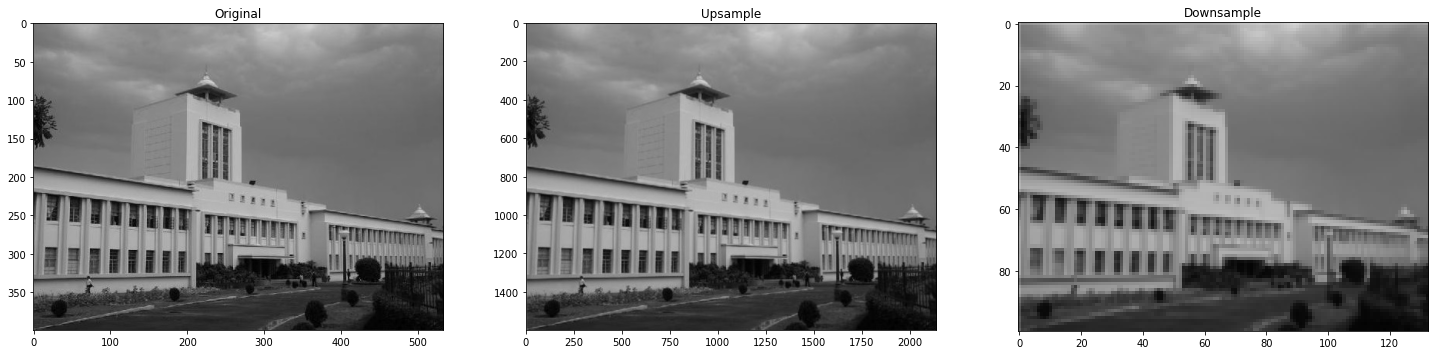

In [ ]:
# Downsampling and Upsampling images
sample_rate = 4
img_dn = img.resize((img.width // sample_rate, img.height // sample_rate), resample=Image.BILINEAR)
img_up = img.resize((img.width * sample_rate, img.height * sample_rate), resample=Image.BILINEAR)

print(img_up.size, img_dn.size)

# img_up.save("fig1_upsample.jpg")
# img_dn.save("fig1_downsample.jpg")

# Plot the images
fig, axes = plt.subplots(1, 3, figsize=(25, 30))
axes[0].imshow(img)
axes[1].imshow(img_up)
axes[2].imshow(img_dn)

axes[0].title.set_text('Original')
axes[1].title.set_text('Upsample')
axes[2].title.set_text('Downsample')

### Observing effects of different quantization levels.

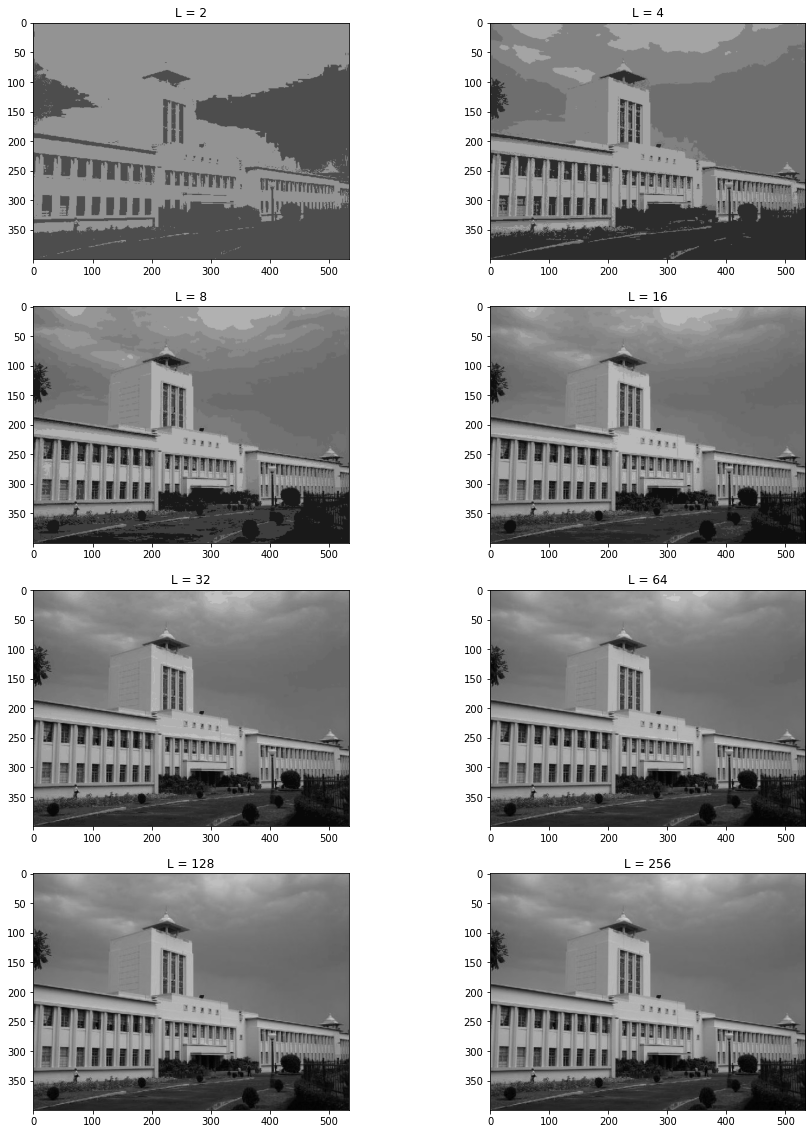

In [ ]:
# Initialize quantization incrementer
L = 2

# Plot image with different quantization levels
fig, axs = plt.subplots(4, 2, figsize=(15, 20))
for i in range(4):
  for j in range(2):
    im = img.quantize(L)
    axs[i][j].imshow(im)
    axs[i][j].title.set_text(f"L = {L}")
    L *= 2

## 2. Compute the mean and variance of the Figure 2. Compute the same parameters for Figure 1. Then add additive white Gaussian noise of mean 0 and standard deviation 20 to both the images and compute the means and variances. Explain your observations. Further, generate several such noisy images from Figure 1 and average all of them. Does the averaged image has less noisy artifact? (Figure 2 image: baboon.jpg)


Mean and variance of Figure 2:
Mean: 128.955078125, Variance: 1820.048641204834

Mean and variance of Figure 1:
Mean: 112.94216760299625, Variance: 2133.1261451142313


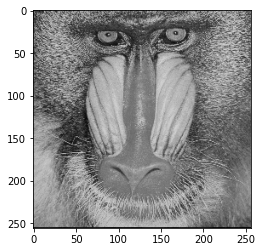

In [ ]:
# Loading Figure 2 i.e. boboon.jpg
img_bb = Image.open('baboon.jpg')
img_bb.load()
plt.imshow(img_bb)

# Mean and variance of Figure 2
print("Mean and variance of Figure 2:")
print(f"Mean: {np.mean(img_bb)}, Variance: {np.var(img_bb)}")

print()

# Mean and variance of Figure 1
print("Mean and variance of Figure 1:")
print(f"Mean: {np.mean(img)}, Variance: {np.var(img)}")

### Adding white Gaussian noise of mean 0 and std dev 20 to Figure 1


Mean and Variance of Noisy Figure 1:
Mean: 116.17946941323346, Variance: 2516.565674624845
<PIL.Image.Image image mode=RGB size=256x256 at 0x7FF9C2A03B70>

Mean and Variance of Noisy Figure 2:
Mean: 129.04493713378906, Variance: 2201.4620563782905


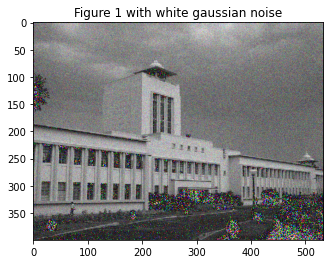

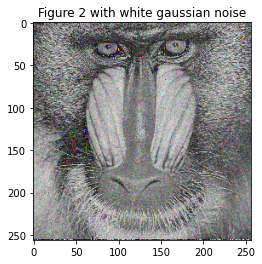

In [ ]:
mean = 0
sigma = 20

# Adding white gaussian noise to Figure 1 image
gauss_1 = np.random.normal(mean, sigma, (img.height, img.width, 3))
gauss_1 = gauss_1.reshape(img.height, img.width, 3)
noisy_1 = img + gauss_1
noisy_1 = Image.fromarray(noisy_1.astype('uint8'))

# print(gauss[0:4,0:4,0])
plt.imshow(noisy_1)
plt.title("Figure 1 with white gaussian noise")

print("\nMean and Variance of Noisy Figure 1:")
print(f"Mean: {np.mean(noisy_1)}, Variance: {np.var(noisy_1)}")

# Adding white gaussian noise to Figure 1 image
gauss_2 = np.random.normal(mean, sigma, (img_bb.height, img_bb.width, 3))
gauss_2 = gauss_2.reshape(img_bb.height, img_bb.width, 3)
noisy_2 = img_bb + gauss_2
noisy_2 = Image.fromarray(noisy_2.astype('uint8'))
print(noisy_2)

# noisy_2.save("baboon_noisy.jpg")
# print(gauss[0:4,0:4,0])
plt.figure()
plt.imshow(noisy_2)
plt.title("Figure 2 with white gaussian noise")

print("\nMean and Variance of Noisy Figure 2:")
print(f"Mean: {np.mean(noisy_2)}, Variance: {np.var(noisy_2)}")

### Creating several noisy images for Figure 1 and averaging all of them.

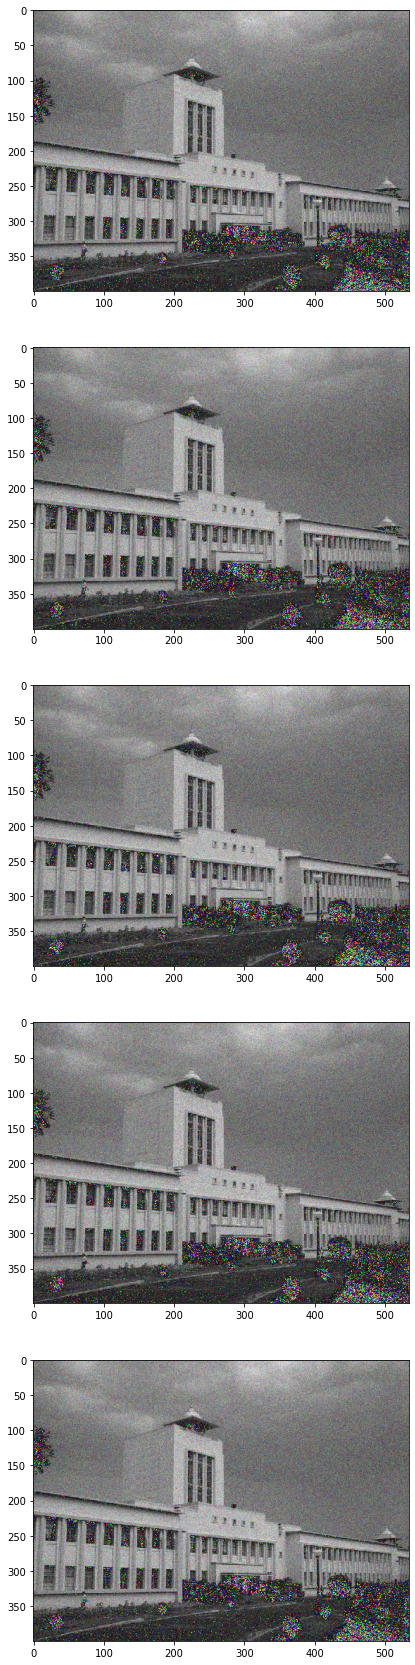

In [ ]:
# Creating 5 random white gaussian noise matrices
num_noise = 5
gauss_n = np.random.normal(mean, sigma, (num_noise, img.height, img.width, 3))
gauss_n = gauss_n.reshape(num_noise, img.height, img.width, 3)

# Adding different white gaussian noises to fig1.jpg
noisy_imgs = []
fig, axes = plt.subplots(num_noise, 1, figsize=(25, 30))
for i in range(num_noise):
  noisy = img + gauss_n[i,:,:,:]
  # print(gauss_n[0:2, 0:2, 0, i])
  noisy_imgs.append(noisy)
  noisy = Image.fromarray(noisy.astype('uint8'))
  # noisy.save(f"fig1_noisy_{i}.jpg")
  axes[i].imshow(noisy)

Shape: (5, 400, 534, 3)
Shape of averaged image: (400, 534, 3)


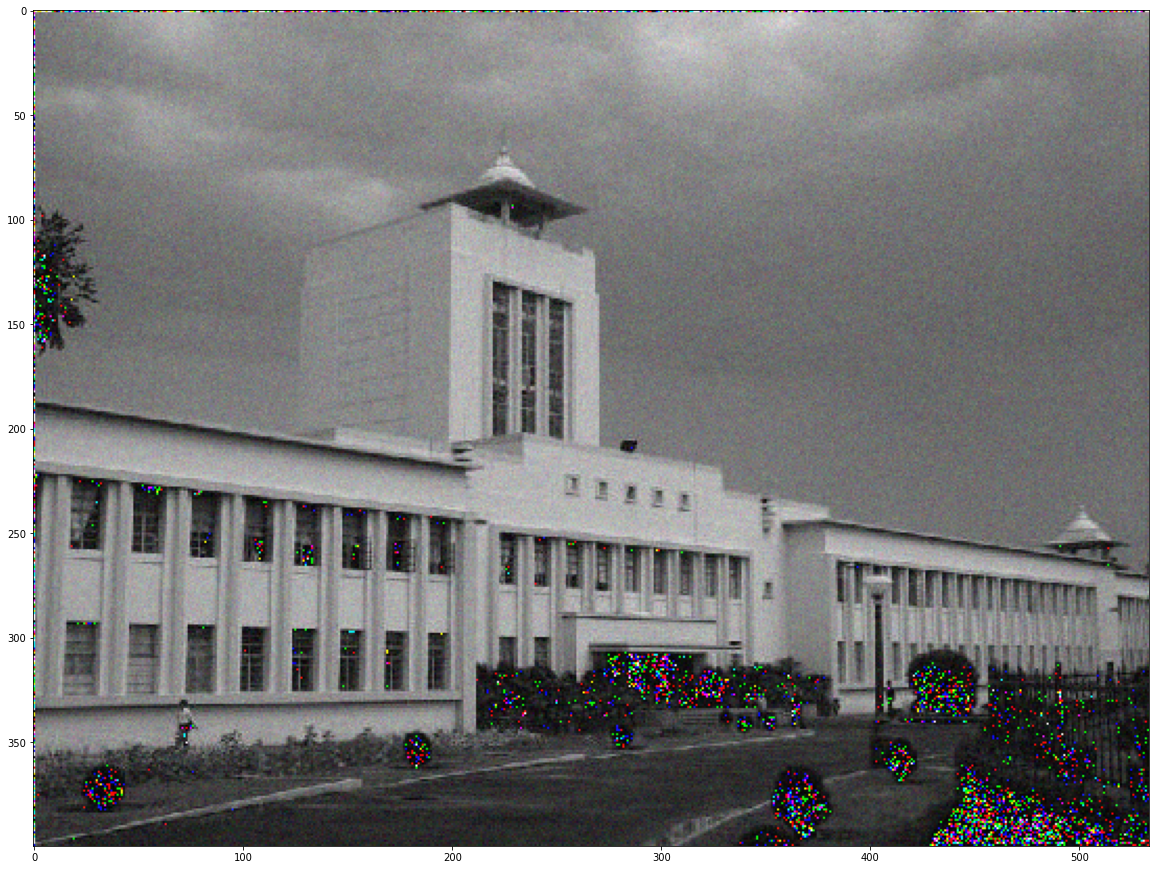

In [ ]:
# Averaging the noisy images
noisy_imgs = np.array(noisy_imgs)
print("Shape:", noisy_imgs.shape)

noisy_avg = np.average(noisy_imgs, axis=0)
noisy_avg = Image.fromarray(noisy_avg.astype('uint8'))
print("Shape of averaged image:", (noisy_avg.height, noisy_avg.width, 3))

plt.figure(figsize=(20, 25))
plt.imshow(noisy_avg)

## 3. Find out the number of objects from the Figure 3. Label distinct objects with distinct colors. [Use the algorithm of finding out connected components.] (Figure 3 image: cc.jpg)

Text(0.5, 1.0, 'Labeled Image of Connected Components')

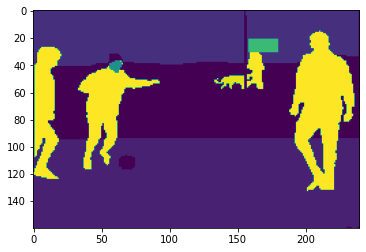

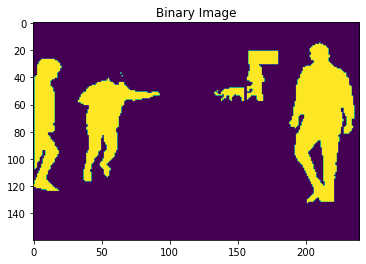

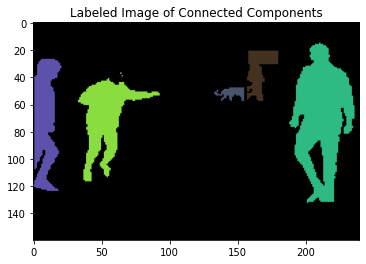

In [ ]:
import cv2

# Read Input Image
img = cv2.imread("cc.jpg", cv2.IMREAD_GRAYSCALE)
plt.imshow(img)

# Threshold is use to check its's limit of pixel value and if pixel is out of hreshold values then assign specific value

# Converting Gray Scale image into binary image
# 1st=Source; 2nd=Classify picture; #3rd=Specific value #4th= Function
_, BImg = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

n_labels, labels,_,_ = cv2.connectedComponentsWithStats(BImg, connectivity=4)

# Create distinct color image
# Generating distinct Colors as much as distinct object 
colors = np.random.randint(0, 255, size=(n_labels, 3), dtype=np.uint8)

# Setting Background Color
colors[0] = [0, 0, 0]

colored = colors[labels]

# Display Output
plt.figure()
plt.imshow(BImg)
plt.title("Binary Image")
plt.figure()
plt.imshow(colored)
plt.title("Labeled Image of Connected Components")

# Image.fromarray(BImg.astype('uint8')).save("cc_binary.jpg")
# Image.fromarray(colored.astype('uint8')).save("cc_labeled.jpg")